- Import Modules

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline 
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False 

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path="c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np

### 1. Data Loading & Cleaning

In [6]:
# Sample Data 
crime2000 = pd.read_csv('../data/crime/2000년.csv', engine='python', encoding='EUC-KR')
crime2000.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,1
1,중부,살인,검거,1
2,중부,강도,발생,17
3,중부,강도,검거,15
4,중부,강간,발생,14


In [9]:
# Merge files from 2000-2018
pieces=[] #개별 데이터 리스트
years = range(2000,2019) #year범위 지정
columns=['area', 'type', 'arrest','frequency'] #column명 지정
for year in years:
    path = '../data/crime/%d년.csv' %year
    frame = pd.read_csv(path, names=columns, skiprows=1, engine='python',header= None, encoding='EUC-KR') 
    frame['year'] = year
    pieces.append(frame)
    crime = pd.concat(pieces, ignore_index=True)

In [10]:
crime[crime.year==2000]

,area,type,arrest,frequency,year
0,중부,살인,발생,1.0,2000
1,중부,살인,검거,1.0,2000
2,중부,강도,발생,17.0,2000
3,중부,강도,검거,15.0,2000
4,중부,강간,발생,14.0,2000
...,...,...,...,...,...
305,수서,강간,검거,29.0,2000
306,수서,절도,발생,1183.0,2000
307,수서,절도,검거,352.0,2000
308,수서,폭력,발생,3351.0,2000


In [11]:
len(crime)

919026

In [288]:
crime.head(10)

,area,type,arrest,frequency,year
0,중부,살인,발생,1,2000
1,중부,살인,검거,1,2000
2,중부,강도,발생,17,2000
3,중부,강도,검거,15,2000
4,중부,강간,발생,14,2000
5,중부,강간,검거,14,2000
6,중부,절도,발생,601,2000
7,중부,절도,검거,569,2000
8,중부,폭력,발생,1783,2000
9,중부,폭력,검거,1762,2000


While debuging, it turned out empty columns were read as 'Nan'. 

In [291]:
crime[crime['type'] == '살인']

,area,type,arrest,frequency,year
0,중부,살인,발생,1,2000
1,중부,살인,검거,1,2000
10,종로,살인,발생,4,2000
11,종로,살인,검거,4,2000
20,남대문,살인,발생,3,2000
...,...,...,...,...,...
918997,은평,살인,검거,4,2018
919006,도봉,살인,발생,1,2018
919007,도봉,살인,검거,1,2018
919016,수서,살인,발생,5,2018


In [ ]:
for i in crime[crime['type'] == '살인'].frequency 

In [13]:
crime.dropna(inplace=True)
len(crime)

5890

In [14]:
crime.head(10)

,area,type,arrest,frequency,year
0,중부,살인,발생,1.0,2000
1,중부,살인,검거,1.0,2000
2,중부,강도,발생,17.0,2000
3,중부,강도,검거,15.0,2000
4,중부,강간,발생,14.0,2000
5,중부,강간,검거,14.0,2000
6,중부,절도,발생,601.0,2000
7,중부,절도,검거,569.0,2000
8,중부,폭력,발생,1783.0,2000
9,중부,폭력,검거,1762.0,2000


In [16]:
#convert dtype of 'frequency' to int  
crime.frequency = crime['frequency'].astype('int32')

### 2. Separate Crime '발생' & '검거'

#### 범죄 발생

In [17]:
incidence = crime[crime.arrest =='발생']
print(incidence.head(10))
print(len(incidence))

   area type arrest  frequency  year
0    중부   살인     발생          1  2000
2    중부   강도     발생         17  2000
4    중부   강간     발생         14  2000
6    중부   절도     발생        601  2000
8    중부   폭력     발생       1783  2000
10   종로   살인     발생          4  2000
12   종로   강도     발생         24  2000
14   종로   강간     발생         18  2000
16   종로   절도     발생        644  2000
18   종로   폭력     발생       1886  2000
2945


In [18]:
incidence.reset_index(inplace=True)

In [19]:
incidence.head()

,index,area,type,arrest,frequency,year
0,0,중부,살인,발생,1,2000
1,2,중부,강도,발생,17,2000
2,4,중부,강간,발생,14,2000
3,6,중부,절도,발생,601,2000
4,8,중부,폭력,발생,1783,2000


In [20]:
incidence = incidence[incidence.columns.difference(['index'])]

In [21]:
incidence.head()

,area,arrest,frequency,type,year
0,중부,발생,1,살인,2000
1,중부,발생,17,강도,2000
2,중부,발생,14,강간,2000
3,중부,발생,601,절도,2000
4,중부,발생,1783,폭력,2000


#### 범죄 검거

In [22]:
arrest = crime[crime.arrest =='검거']
print(arrest.head(10))
print(len(arrest))

   area type arrest  frequency  year
1    중부   살인     검거          1  2000
3    중부   강도     검거         15  2000
5    중부   강간     검거         14  2000
7    중부   절도     검거        569  2000
9    중부   폭력     검거       1762  2000
11   종로   살인     검거          4  2000
13   종로   강도     검거         36  2000
15   종로   강간     검거         18  2000
17   종로   절도     검거        385  2000
19   종로   폭력     검거       1830  2000
2945


In [23]:
arrest.reset_index(inplace=True)
arrest = arrest[arrest.columns.difference(['index'])]
arrest.head()

,area,arrest,frequency,type,year
0,중부,검거,1,살인,2000
1,중부,검거,15,강도,2000
2,중부,검거,14,강간,2000
3,중부,검거,569,절도,2000
4,중부,검거,1762,폭력,2000


### 3. Data Processing 
https://rfriend.tistory.com/275

#### 3.1 지역별 범죄 발생

In [24]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5890 entries, 0 to 919025
Data columns (total 5 columns):
area         5890 non-null object
type         5890 non-null object
arrest       5890 non-null object
frequency    5890 non-null int32
year         5890 non-null int64
dtypes: int32(1), int64(1), object(3)
memory usage: 253.1+ KB


In [25]:
incidence_area_type = incidence.pivot_table(index='area', 
                    columns='type', 
                    values='frequency',
                     aggfunc='sum') #aggfunc default = mean 
incidence_area_type.head()

type,강간,강도,살인,절도,폭력
area,,,,,
강남,4400,1418,139,41710,60534
강동,2386,828,130,31537,57113
강북,2522,779,142,22637,50874
강서,3300,1014,201,38363,65401
관악,4942,912,152,42667,61293


In [26]:
incidence_area_type['합계'] = incidence_area_type.sum(axis=1)
incidence_area_type.head()

type,강간,강도,살인,절도,폭력,합계
area,,,,,,
강남,4400,1418,139,41710,60534,108201
강동,2386,828,130,31537,57113,91994
강북,2522,779,142,22637,50874,76954
강서,3300,1014,201,38363,65401,108279
관악,4942,912,152,42667,61293,109966


#### **[Graph] 경찰서별 총 범죄 발생 횟수**

In [27]:
incidence_sum_area = pd.DataFrame(incidence_area_type.iloc[:,5]) # 합계 

In [28]:
incidence_sum_area.head()

,합계
area,
강남,108201
강동,91994
강북,76954
강서,108279
관악,109966


In [29]:
incidence_sum_area.reset_index(inplace=True)
incidence_sum_area.head()

,area,합계
0,강남,108201
1,강동,91994
2,강북,76954
3,강서,108279
4,관악,109966


In [30]:
incidence_sum_area = incidence_sum_area.sort_values('합계', ascending = False)

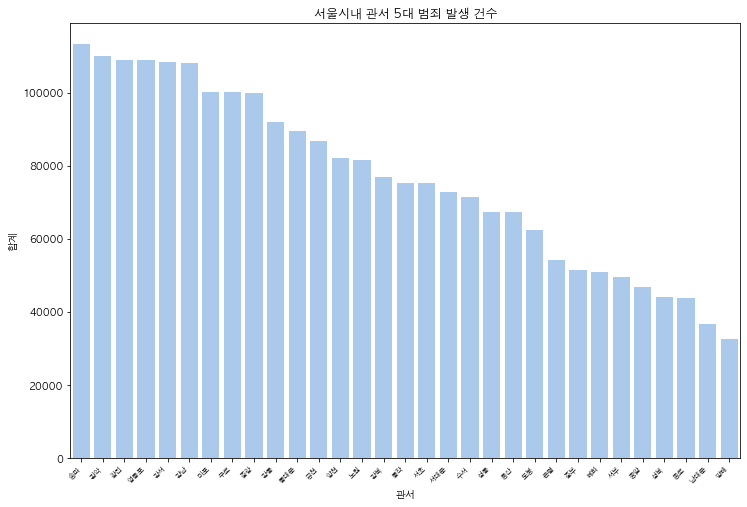

In [181]:
plt.figure(figsize=(12,8))
sns.set_color_codes('pastel')
plot = sns.barplot(x = 'area', y = '합계', color='b',data = incidence_sum_area)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45,
                  horizontalalignment='right',
                  fontweight='light',
                  fontsize='x-small')
plt.xlabel('관서')
plt.title('서울시내 관서 5대 범죄 발생 건수')

plt.show()

#### **[Graph] 경찰서별 5대 범죄별 발생 횟수**

In [32]:
incidence_area_type.head()
incidence_area_type.sort_values(by='합계',ascending=False, inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

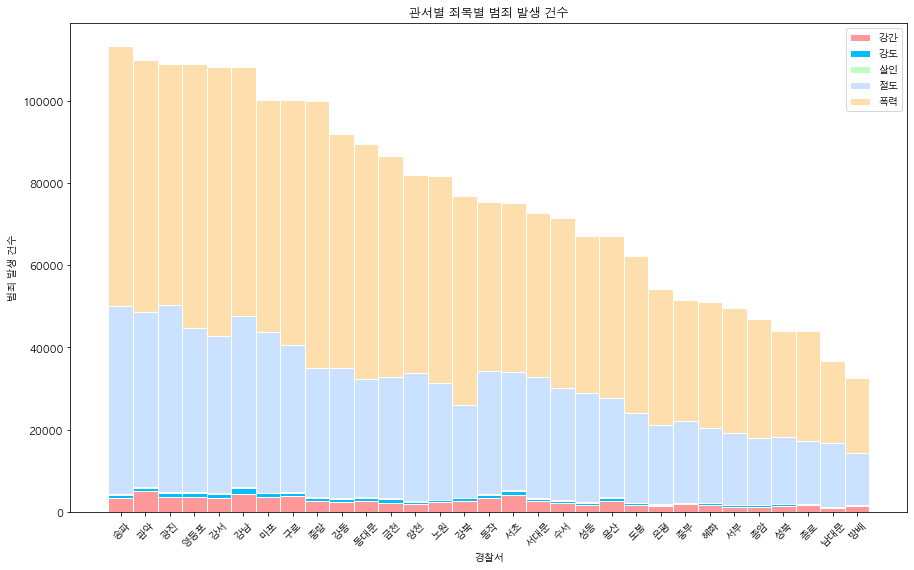

In [33]:
colors = ['#FF9999', '#00BFFF','#C1FFC1','#CAE1FF','#FFDEAD']
rape = incidence_area_type['강간']
burglar=incidence_area_type['강도']
murder = incidence_area_type['살인']
theft = incidence_area_type['절도']
violence = incidence_area_type['폭력']

r = range(len(incidence_area_type))

barWidth = 1
#plot bars
plt.figure(figsize=(15,9))
plt.bar(r, rape, color=colors[0], edgecolor='white', width=barWidth, label="강간")
plt.bar(r, burglar, bottom=np.array(rape), color=colors[1], edgecolor='white', width=barWidth, label='강도')
plt.bar(r, murder, bottom=np.array(rape)+np.array(burglar), color=colors[2], edgecolor='white', width=barWidth, label='살인')
plt.bar(r, theft, bottom=np.array(rape)+np.array(burglar)+np.array(murder), color=colors[3], edgecolor='white', width=barWidth, label='절도')
plt.bar(r, violence, bottom=np.array(rape)+np.array(burglar)+np.array(murder)+np.array(theft), color=colors[4], edgecolor='white', width=barWidth, label='폭력')
plt.xlabel('경찰서')
plt.ylabel('범죄 발생 건수')
plt.title('관서별 죄목별 범죄 발생 건수')
plt.legend()
plt.savefig('fig1.png', dpi=300)


plt.xticks(r, list(incidence_area_type.index), fontweight='bold')
plt.xticks(rotation=45) 

#### 3.2 년도별 범죄 발생 횟수

In [34]:
incidence_year_type = incidence.pivot_table(index='year', 
                    columns='type', 
                    values='frequency',
                     aggfunc='sum') #aggfunc default = mean 
incidence_year_type.head()

type,강간,강도,살인,절도,폭력
year,,,,,
2000,1554,1400,167,36025,96931
2001,2186,1873,203,52227,98991
2002,1860,2138,168,61699,81837
2003,2100,2840,175,57707,81910
2004,2974,1660,228,36193,80360


In [35]:
incidence_year_type['합계'] = incidence_year_type.sum(axis=1)
incidence_year_type.head()

type,강간,강도,살인,절도,폭력,합계
year,,,,,,
2000,1554,1400,167,36025,96931,136077
2001,2186,1873,203,52227,98991,155480
2002,1860,2138,168,61699,81837,147702
2003,2100,2840,175,57707,81910,144732
2004,2974,1660,228,36193,80360,121415


In [36]:
incidence_year_type.reset_index(inplace=True)
incidence_year_type.head()

type,year,강간,강도,살인,절도,폭력,합계
0,2000,1554,1400,167,36025,96931,136077
1,2001,2186,1873,203,52227,98991,155480
2,2002,1860,2138,168,61699,81837,147702
3,2003,2100,2840,175,57707,81910,144732
4,2004,2974,1660,228,36193,80360,121415


* 참고: ploting unstaked table
incidence_year_type.plot(figsize=(16, 9), title='Crime Incidence by Year');
plt.ticklabel_format(style='plain', axis='y')

In [39]:
list(incidence_year_type.year)

[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018]

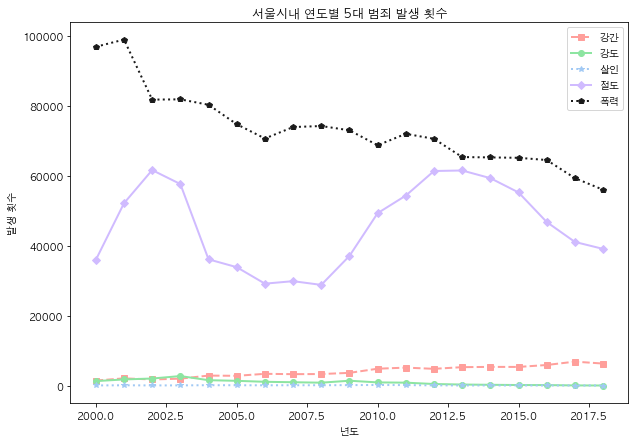

In [40]:
plt.figure(figsize=(10,7))
plt.plot(list(incidence_year_type.year), incidence_year_type['강간'], marker='s', color='r', label='강간',linestyle='--', linewidth=2)
plt.plot(list(incidence_year_type.year), incidence_year_type['강도'], marker='o', color='g',label='강도',linestyle='-', linewidth=2)
plt.plot(list(incidence_year_type.year), incidence_year_type['살인'], marker='*', color='b',label='살인',linestyle=':', linewidth=2)
plt.plot(list(incidence_year_type.year), incidence_year_type['절도'], marker='D', color='m', linestyle='-', linewidth=2, label='절도')
plt.plot(list(incidence_year_type.year), incidence_year_type['폭력'], marker='p', color='k',linestyle=':', linewidth=2,label='폭력')
plt.title('서울시내 연도별 5대 범죄 발생 횟수')
plt.ylabel('발생 횟수')
plt.xlabel('년도')
plt.legend()

plt.show()

No handles with labels found to put in legend.


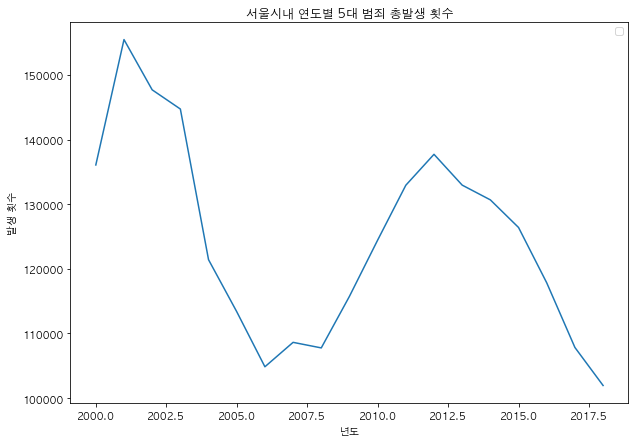

In [67]:
plt.figure(figsize=(10,7))
plt.plot(list(incidence_year_type.year), incidence_year_type['합계'])
plt.title('서울시내 연도별 5대 범죄 총발생 횟수')
plt.ylabel('발생 횟수')
plt.xlabel('년도')
plt.legend()

#### 3.3 범죄 검거율 

In [41]:
print(incidence.head())
print(len(incidence))

  area arrest  frequency type  year
0   중부     발생          1   살인  2000
1   중부     발생         17   강도  2000
2   중부     발생         14   강간  2000
3   중부     발생        601   절도  2000
4   중부     발생       1783   폭력  2000
2945


In [42]:
print(arrest.head())
print(len(arrest))

  area arrest  frequency type  year
0   중부     검거          1   살인  2000
1   중부     검거         15   강도  2000
2   중부     검거         14   강간  2000
3   중부     검거        569   절도  2000
4   중부     검거       1762   폭력  2000
2945


In [43]:
total = pd.concat([incidence, arrest], axis=1)
total.head()

,area,arrest,frequency,type,year,area,arrest,frequency,type,year
0,중부,발생,1,살인,2000,중부,검거,1,살인,2000
1,중부,발생,17,강도,2000,중부,검거,15,강도,2000
2,중부,발생,14,강간,2000,중부,검거,14,강간,2000
3,중부,발생,601,절도,2000,중부,검거,569,절도,2000
4,중부,발생,1783,폭력,2000,중부,검거,1762,폭력,2000


In [44]:
total.columns = ['지역','x','발생 빈도','x','x','x','x','검거 빈도','죄목','년도']
total = total[['지역','발생 빈도','검거 빈도','죄목','년도']]
total.head()

,지역,발생 빈도,검거 빈도,죄목,년도
0,중부,1,1,살인,2000
1,중부,17,15,강도,2000
2,중부,14,14,강간,2000
3,중부,601,569,절도,2000
4,중부,1783,1762,폭력,2000


**total['검거율'] = total['검거 빈도'] / total['발생 빈도']**
----> We need to remove '0' from denominator beforehand

In [45]:
total = total[total['발생 빈도'] != 0]
print(total.head())
print(len(total))

   지역  발생 빈도  검거 빈도  죄목    년도
0  중부      1      1  살인  2000
1  중부     17     15  강도  2000
2  중부     14     14  강간  2000
3  중부    601    569  절도  2000
4  중부   1783   1762  폭력  2000
2931


In [46]:
total['검거율'] = total['검거 빈도'] / total['발생 빈도']
total.head()

,지역,발생 빈도,검거 빈도,죄목,년도,검거율
0,중부,1,1,살인,2000,1.000000
1,중부,17,15,강도,2000,0.882353
2,중부,14,14,강간,2000,1.000000
3,중부,601,569,절도,2000,0.946755
4,중부,1783,1762,폭력,2000,0.988222


In [47]:
total.isna().sum()

지역       0
발생 빈도    0
검거 빈도    0
죄목       0
년도       0
검거율      0
dtype: int64

#### [GRAPH] 지역 별 범죄 검거율 

In [48]:
rate_area = round(total.groupby(['지역']).mean(),2)
rate_area.head()

,발생 빈도,검거 빈도,년도,검거율
지역,,,,
강남,1138.96,803.18,2009.00,0.78
강동,968.36,773.77,2009.00,0.90
강북,810.04,673.58,2009.00,0.86
강서,1139.78,847.17,2009.00,0.83
관악,1169.85,782.02,2009.05,0.72


In [49]:
rate_area.reset_index(inplace=True)
rate_area.sort_values(by='검거율',ascending=False, inplace=True)
rate_area.head(5)

,지역,발생 빈도,검거 빈도,년도,검거율
27,종암,493.85,406.95,2009.00,0.92
16,서부,532.14,428.14,2008.85,0.91
1,강동,968.36,773.77,2009.00,0.90
14,방배,352.92,268.95,2008.88,0.90
18,성동,707.62,545.84,2009.00,0.89


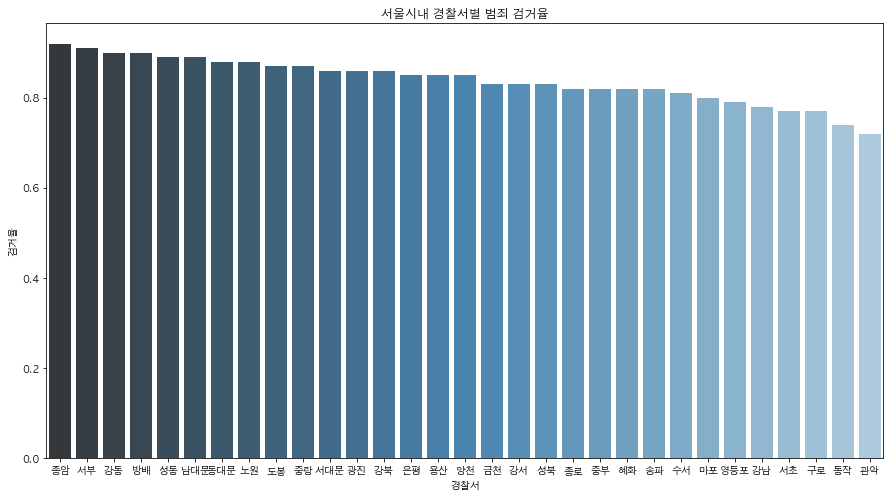

In [50]:
rate_area.sort_values(by='검거율',ascending=False, inplace=True)
plt.figure(figsize=(15,8))
ax = sns.barplot(y= "검거율", x = "지역", data = rate_area, palette=("Blues_d"))
ax.set_title('서울시내 경찰서별 범죄 검거율')
ax.set_ylabel('검거율')
ax.set_xlabel('경찰서')
plt.show()

In [278]:
rate_area1 = total.groupby(['지역']).sum()
rate_area1.head()

,발생 빈도,검거 빈도,년도,검거율
지역,,,,
강남,108201,76302,190855,73.852168
강동,91994,73508,190855,85.830969
강북,76954,63990,190855,82.055888
강서,108279,80481,190855,78.742740
관악,109966,73510,188851,67.774985


In [282]:
rate_area1.reset_index(inplace=True)
rate_area1.sort_values(by='발생 빈도',ascending=False, inplace=True)
rate_area1.head(5)

,지역,발생 빈도,검거 빈도,년도,검거율
0,송파,113367,76268,190855,78.319105
1,관악,109966,73510,188851,67.774985
2,광진,108983,77936,190855,81.686766
3,영등포,108928,79128,190855,74.813441
4,강서,108279,80481,190855,78.742740


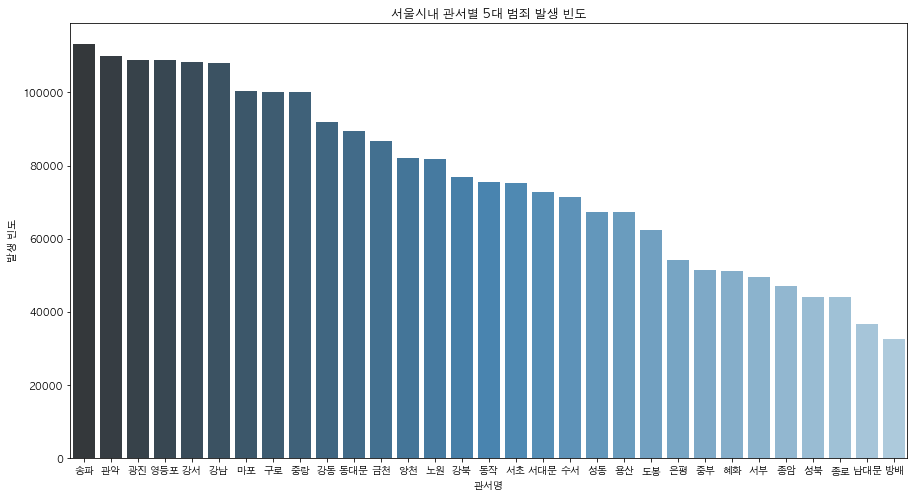

In [283]:
plt.figure(figsize=(15,8))
ax = sns.barplot(y= "발생 빈도", x = "지역", data = rate_area1, palette=("Blues_d"))
ax.set_title('서울시내 관서별 5대 범죄 발생 빈도')
ax.set_ylabel('발생 빈도')
ax.set_xlabel('관서명')
plt.show()

In [177]:
freq_rate_area = total.groupby('지역').agg({'발생 빈도':'sum', 
                         '검거 빈도':'sum', 
                         '검거율':'mean'
                        })

In [190]:
freq_rate_area.head()

,발생 빈도,검거 빈도,검거율
지역,,,
강남,108201,76302,0.777391
강동,91994,73508,0.903484
강북,76954,63990,0.863746
강서,108279,80481,0.828871
관악,109966,73510,0.721010


In [ ]:
df = freq_rate_area['검거율']

In [192]:
freq_rate_area['검거율']

지역
강남     0.777391
강동     0.903484
강북     0.863746
강서     0.828871
관악     0.721010
광진     0.859861
구로     0.770063
금천     0.830504
남대문    0.885404
노원     0.877198
도봉     0.866298
동대문    0.879079
동작     0.744663
마포     0.803221
방배     0.902991
서대문    0.861616
서부     0.913306
서초     0.770848
성동     0.890523
성북     0.830502
송파     0.824412
수서     0.810497
양천     0.848258
영등포    0.787510
용산     0.848039
은평     0.852867
종로     0.817120
종암     0.918484
중랑     0.869012
중부     0.821280
혜화     0.821977
Name: 검거율, dtype: float64

In [ ]:
matplotlib.pyplot.table

In [120]:
total.head()

,지역,발생 빈도,검거 빈도,죄목,년도,검거율
0,중부,1,1,살인,2000,1.000000
1,중부,17,15,강도,2000,0.882353
2,중부,14,14,강간,2000,1.000000
3,중부,601,569,절도,2000,0.946755
4,중부,1783,1762,폭력,2000,0.988222


#### [GRAPH] 지역별 범죄 발생 횟수 & 검거 횟수 비교 

In [184]:
freq_area = total.groupby(['지역']).sum()
freq_area.head()

,발생 빈도,검거 빈도,년도,검거율
지역,,,,
강남,108201,76302,190855,73.852168
강동,91994,73508,190855,85.830969
강북,76954,63990,190855,82.055888
강서,108279,80481,190855,78.742740
관악,109966,73510,188851,67.774985


In [185]:
freq_area=freq_area[['발생 빈도','검거 빈도']]
freq_area.reset_index(inplace=True)
freq_area.head()

,지역,발생 빈도,검거 빈도
0,강남,108201,76302
1,강동,91994,73508
2,강북,76954,63990
3,강서,108279,80481
4,관악,109966,73510


In [142]:
freq_area_melted = freq_area.melt(id_vars='지역')

KeyError: '지역'

In [171]:
freq_area_melted.sort_values(by='value', ascending=False, inplace=True)
freq_area_melted.head()
freq_area_melted.columns = ['관서',' ','빈도']

In [172]:
freq_area_melted.head()

,관서,,빈도
20,송파,발생 빈도,113367
4,관악,발생 빈도,109966
5,광진,발생 빈도,108983
23,영등포,발생 빈도,108928
3,강서,발생 빈도,108279


In [175]:
# execute PLOTLY 
import plotly.express as px
plt.figure(figsize=(15,8))
fig = px.bar(freq_area_melted, x="관서", y="빈도", color=' ', barmode='group',
             height=400,color_discrete_sequence=px.colors.qualitative.Set3)

fig.update_layout(
    title='서울시내 관서별 5대 범죄 발생 횟수 및 검거 횟수',
    yaxis_title="횟수", xaxis_title='관서명',xaxis_tickangle=-45)


fig.show()


<Figure size 1080x576 with 0 Axes>

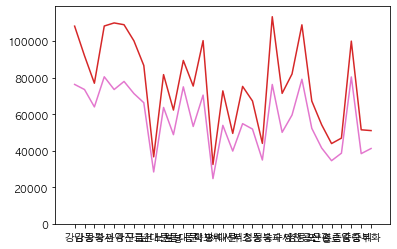

In [212]:
plt.plot(freq_rate_area['발생 빈도'], color='#d62728', label='발생 빈도')
plt.plot(freq_rate_area['검거 빈도'], color='#e377ce', label = '검거 빈도')
plt.show()

In [264]:
np.arange(0, 1, step=0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

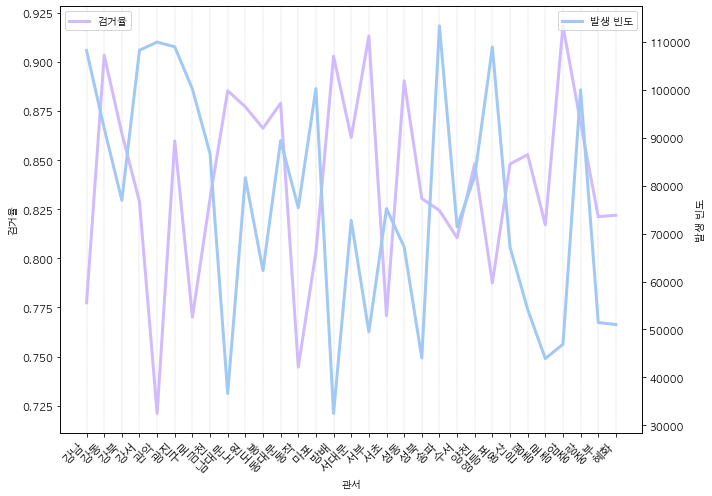

In [284]:

fig, ax1 = plt.subplots(figsize=(10,7))

ax1.set_xlabel('관서')
ax1.set_ylabel('검거율')
ax1.plot(freq_rate_area['검거율'], color='m', label ='검거율', linewidth=3)
ax1.set_xticklabels(freq_rate_area.index,rotation=45, ha='right',fontweight='bold', fontsize=12)
ax1.set_xticks(np.arange(0, 1, step=0.1))
plt.legend(loc='upper left')
ax1.grid(axis='x', color='grey', linestyle='-.', linewidth='0.2')


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('발생 빈도') # we already handled the x-label with ax1
ax2.plot(freq_rate_area['발생 빈도'], color='b', label='발생 빈도', linewidth=3)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.legend(loc='upper right')

plt.show()

In [187]:
freq_area_melted1.head()

,지역,variable,value
0,강남,발생 빈도,108201
1,강동,발생 빈도,91994
2,강북,발생 빈도,76954
3,강서,발생 빈도,108279
4,관악,발생 빈도,109966


In [197]:
len(freq_area_melted1)

62

31

In [156]:
area_type = total.pivot_table(index=['지역'], 
                    columns='죄목', 
                    values=['검거율','발생 빈도','검거 빈도'],
                     aggfunc={'검거율' : 'mean', '발생 빈도' : 'sum', '발생 빈도': 'sum'}) #aggfunc default = mean 
area_type

검거율                                         발생 빈도                    \
죄목         강간        강도        살인        절도        폭력    강간    강도   살인     절도   
지역                                                                              
강남   0.749623  0.769744  1.029641  0.443576  0.894371  4400  1418  139  41710   
강동   0.901278  1.021059  0.995823  0.690939  0.908320  2386   828  130  31537   
강북   0.864869  0.944774  0.957101  0.621193  0.930794  2522   779  142  22637   
강서   0.857818  0.934138  0.979748  0.482923  0.889729  3300  1014  201  38363   
관악   0.630442  0.809680  0.915394  0.386436  0.873330  4942   912  152  42667   
광진   0.836638  0.950504  1.146531  0.491655  0.873975  3569  1006  150  45594   
구로   0.626331  0.860859  1.035277  0.452661  0.875189  3856   751  202  35673   
금천   0.878490  0.832010  1.016093  0.537755  0.888174  2244   865  168  29614   
남대문  0.861277  0.966497  1.083333  0.596613  0.929719   975   226   33  15617   
노원   0.877809  0.983518  1.032872  0.582260  0.909532  2392   386  130  28534   
도봉   0.931805  0.977448  0.976023  0.536520  0.909693  1645   395   90  21874   
동대문  0.898661  0.911707  0.980633  0.668478  0.935915  2550   869  173  28727   
동작   0.625443  0.732133  1.007555  0.469827  0.888358  3481   653  134  29910   
마포   0.853078  0.848383  0.997306  0.435144  0.882194  3724   810  103  38994   
방배   0.674001  1.033324  1.390625  0.582028  0.911971  1385   337   33  12549   
서대문  0.861328  1.040347  0.999123  0.524143  0.883141  2569   659  106  29448   
서부   0.931809  1.077501  1.079762  0.584516  0.910346  1124   474   81  17522   
서초   0.612502  0.658575  1.147953  0.538693  0.896514  4095  1061   92  28719   
성동   0.810179  1.060998  1.108749  0.573079  0.899611  1730   514   87  26570   
성북   0.720731  0.972301  0.922807  0.644507  0.899625  1534   327   81  16302   
송파   0.829949  1.031845  0.952565  0.433659  0.874040  3388   759  139  45883   
수서   0.842759  0.894711  0.993421  0.459571  0.862022  2048   662   90  27340   
양천   0.863033  0.967346  1.040896  0.504837  0.865177  1877   574  115  31319   
영등포  0.801816  0.817471  0.933998  0.501601  0.882663  3690   765  258  40057   
용산   0.872137  0.818780  1.050668  0.613259  0.885352  2678   704  122  24067   
은평   0.936999  0.960049  0.935840  0.532647  0.898803  1362   356   87  19390   
종로   0.875101  0.950574  0.750000  0.615506  0.890885  1562   289   72  15286   
종암   0.912024  1.106067  1.037657  0.629682  0.906987  1132   454   89  16181   
중랑   0.870930  0.940015  1.016954  0.608453  0.908710  2573   827  194  31458   
중부   0.612878  0.956686  1.127778  0.566152  0.907433  1942   283   38  19888   
혜화   0.667341  0.860589  0.967989  0.704213  0.917438  1721   335   52  18349   

            
죄목      폭력  
지역          
강남   60534  
강동   57113  
강북   50874  
강서   65401  
관악   61293  
광진   58664  
구로   59684  
금천   53768  
남대문  19803  
노원   50226  
도봉   38276  
동대문  57093  
동작   41226  
마포   56639  
방배   18165  
서대문  39991  
서부   30288  
서초   41247  
성동   38323  
성북   25782  
송파   63198  
수서   41268  
양천   48129  
영등포  64158  
용산   39638  
은평   32999  
종로   26711  
종암   29060  
중랑   64950  
중부   29308  
혜화   30568

In [180]:
area_type['검거율'].head()

죄목,강간,강도,살인,절도,폭력
지역,,,,,
강남,0.749623,0.769744,1.029641,0.443576,0.894371
강동,0.901278,1.021059,0.995823,0.690939,0.908320
강북,0.864869,0.944774,0.957101,0.621193,0.930794
강서,0.857818,0.934138,0.979748,0.482923,0.889729
관악,0.630442,0.809680,0.915394,0.386436,0.873330


#### 연도 별 검거율 

In [73]:
total.head()

,지역,발생 빈도,검거 빈도,죄목,년도,검거율
0,중부,1,1,살인,2000,1.000000
1,중부,17,15,강도,2000,0.882353
2,중부,14,14,강간,2000,1.000000
3,중부,601,569,절도,2000,0.946755
4,중부,1783,1762,폭력,2000,0.988222


In [86]:
year_area_type = total.pivot_table(index=['년도','지역'], 
                    columns='죄목', 
                    values=['검거율','발생 빈도','검거 빈도'],
                     aggfunc={'검거율' : 'mean', '발생 빈도' : 'sum', '발생 빈도': 'sum'}) #aggfunc default = mean 
year_area_type

검거율                                          발생 빈도               \
죄목             강간        강도        살인        절도        폭력     강간     강도    살인   
년도   지역                                                                         
2000 강남  0.897436  0.493151  1.333333  0.197135  0.888185   78.0  146.0   3.0   
     강동  0.935484  0.816327  0.916667  0.365071  0.918787   62.0   49.0  12.0   
     강북  1.021277  1.021277  0.888889  0.533178  0.950883   47.0   47.0   9.0   
     강서  0.853333  0.733333  1.166667  0.326491  0.914469   75.0   75.0   6.0   
     관악  0.745763  0.642857  0.875000  0.197846  0.909962   59.0   56.0   8.0   
...           ...       ...       ...       ...       ...    ...    ...   ...   
2018 종로  0.838235  0.000000  0.800000  0.534946  0.877984  136.0    1.0   5.0   
     종암  0.862069  2.000000  0.833333  0.597518  0.868914   58.0    1.0   6.0   
     중랑  0.833333  1.000000  1.250000  0.574050  0.849671  174.0    3.0   4.0   
     중부  0.477273  1.400000  1.000000  0.392621  0.858844  132.0    5.0   1.0   
     혜화  0.580000  1.000000  1.000000  0.460081  0.856799  100.0    2.0   1.0   

                         
죄목           절도      폭력  
년도   지역                  
2000 강남  2653.0  4892.0  
     강동  1838.0  4716.0  
     강북   859.0  3624.0  
     강서  1559.0  4361.0  
     관악  1764.0  2921.0  
...         ...     ...  
2018 종로   744.0  1131.0  
     종암   564.0   801.0  
     중랑  1526.0  2581.0  
     중부  1057.0  1176.0  
     혜화   739.0   831.0  

[589 rows x 10 columns]

In [88]:
year_area_type.reset_index(inplace=True)
year_area_type.head()

년도  지역       검거율                                         발생 빈도         \
죄목                  강간        강도        살인        절도        폭력    강간     강도   
0   2000  강남  0.897436  0.493151  1.333333  0.197135  0.888185  78.0  146.0   
1   2000  강동  0.935484  0.816327  0.916667  0.365071  0.918787  62.0   49.0   
2   2000  강북  1.021277  1.021277  0.888889  0.533178  0.950883  47.0   47.0   
3   2000  강서  0.853333  0.733333  1.166667  0.326491  0.914469  75.0   75.0   
4   2000  관악  0.745763  0.642857  0.875000  0.197846  0.909962  59.0   56.0   

                          
죄목    살인      절도      폭력  
0    3.0  2653.0  4892.0  
1   12.0  1838.0  4716.0  
2    9.0   859.0  3624.0  
3    6.0  1559.0  4361.0  
4    8.0  1764.0  2921.0

In [89]:
year_area_type.set_index('지역')

년도       검거율                                          발생 빈도         \
죄목              강간        강도        살인        절도        폭력     강간     강도   
지역                                                                         
강남  2000  0.897436  0.493151  1.333333  0.197135  0.888185   78.0  146.0   
강동  2000  0.935484  0.816327  0.916667  0.365071  0.918787   62.0   49.0   
강북  2000  1.021277  1.021277  0.888889  0.533178  0.950883   47.0   47.0   
강서  2000  0.853333  0.733333  1.166667  0.326491  0.914469   75.0   75.0   
관악  2000  0.745763  0.642857  0.875000  0.197846  0.909962   59.0   56.0   
..   ...       ...       ...       ...       ...       ...    ...    ...   
종로  2018  0.838235  0.000000  0.800000  0.534946  0.877984  136.0    1.0   
종암  2018  0.862069  2.000000  0.833333  0.597518  0.868914   58.0    1.0   
중랑  2018  0.833333  1.000000  1.250000  0.574050  0.849671  174.0    3.0   
중부  2018  0.477273  1.400000  1.000000  0.392621  0.858844  132.0    5.0   
혜화  2018  0.580000  1.000000  1.000000  0.460081  0.856799  100.0    2.0   

                          
죄목    살인      절도      폭력  
지역                        
강남   3.0  2653.0  4892.0  
강동  12.0  1838.0  4716.0  
강북   9.0   859.0  3624.0  
강서   6.0  1559.0  4361.0  
관악   8.0  1764.0  2921.0  
..   ...     ...     ...  
종로   5.0   744.0  1131.0  
종암   6.0   564.0   801.0  
중랑   4.0  1526.0  2581.0  
중부   1.0  1057.0  1176.0  
혜화   1.0   739.0   831.0  

[589 rows x 11 columns]

In [90]:
year_area_type.columns

MultiIndex([(   '년도',   ''),
            (   '지역',   ''),
            (  '검거율', '강간'),
            (  '검거율', '강도'),
            (  '검거율', '살인'),
            (  '검거율', '절도'),
            (  '검거율', '폭력'),
            ('발생 빈도', '강간'),
            ('발생 빈도', '강도'),
            ('발생 빈도', '살인'),
            ('발생 빈도', '절도'),
            ('발생 빈도', '폭력')],
           names=[None, '죄목'])

### 범죄별 검거율 

In [100]:
###범죄별 지역별 검거율 
rate_area_crime = year_area_type[['지역','검거율']]

In [101]:
rate_area_crime.set_index('지역', inplace= True)

In [102]:
rate_area_crime.head()

검거율                                        
죄목        강간        강도        살인        절도        폭력
지역                                                  
강남  0.897436  0.493151  1.333333  0.197135  0.888185
강동  0.935484  0.816327  0.916667  0.365071  0.918787
강북  1.021277  1.021277  0.888889  0.533178  0.950883
강서  0.853333  0.733333  1.166667  0.326491  0.914469
관악  0.745763  0.642857  0.875000  0.197846  0.909962

In [128]:
rate_area_crime['검거율']

죄목,강간,강도,살인,절도,폭력
지역,,,,,
강남,0.897436,0.493151,1.333333,0.197135,0.888185
강동,0.935484,0.816327,0.916667,0.365071,0.918787
강북,1.021277,1.021277,0.888889,0.533178,0.950883
강서,0.853333,0.733333,1.166667,0.326491,0.914469
관악,0.745763,0.642857,0.875000,0.197846,0.909962
...,...,...,...,...,...
종로,0.838235,0.000000,0.800000,0.534946,0.877984
종암,0.862069,2.000000,0.833333,0.597518,0.868914
중랑,0.833333,1.000000,1.250000,0.574050,0.849671


In [139]:
rate_area_crime_t=rate_area_crime.transpose()

In [311]:
rate_area_crime_t.head()

지역            강남        강동        강북        강서        관악        광진        구로  \
    죄목                                                                         
검거율 강간  0.897436  0.935484  1.021277  0.853333  0.745763  1.043478  0.963636   
    강도  0.493151  0.816327  1.021277  0.733333  0.642857  0.931034  1.057143   
    살인  1.333333  0.916667  0.888889  1.166667  0.875000  2.500000  1.000000   
    절도  0.197135  0.365071  0.533178  0.326491  0.197846  0.401036  0.351324   
    폭력  0.888185  0.918787  0.950883  0.914469  0.909962  0.957158  0.933130   

지역            금천       남대문        노원  ...        수서        양천       영등포  \
    죄목                                ...                                 
검거율 강간  0.954545  0.884615  0.800000  ...  0.881443  0.925000  0.682864   
    강도  0.794521  0.538462  0.947368  ...  0.400000  3.500000  0.750000   
    살인  0.900000  1.000000  1.000000  ...  1.000000  1.500000  0.882353   
    절도  0.325737  0.605322  0.450742  ...  0.488821  0.466763  0.464223   
    폭력  0.910150  0.993854  0.961224  ...  0.850324  0.840399  0.820562   

지역            용산        은평        종로        종암        중랑        중부        혜화  
    죄목                                                                        
검거율 강간  0.861027  0.900000  0.838235  0.862069  0.833333  0.477273  0.580000  
    강도  0.666667  1.000000  0.000000  2.000000  1.000000  1.400000  1.000000  
    살인  1.000000  1.000000  0.800000  0.833333  1.250000  1.000000  1.000000  
    절도  0.476277  0.635188  0.534946  0.597518  0.574050  0.392621  0.460081  
    폭력  0.875253  0.885321  0.877984  0.868914  0.849671  0.858844  0.856799  

[5 rows x 589 columns]

In [319]:
rate_area_crime_t.reset_index(inplace=True)

In [321]:
rate_area_crime_t.head()


지역,level_0,죄목,강남,강동,강북,강서,관악,광진,구로,금천,...,수서,양천,영등포,용산,은평,종로,종암,중랑,중부,혜화
0,검거율,강간,0.897436,0.935484,1.021277,0.853333,0.745763,1.043478,0.963636,0.954545,...,0.881443,0.925000,0.682864,0.861027,0.900000,0.838235,0.862069,0.833333,0.477273,0.580000
1,검거율,강도,0.493151,0.816327,1.021277,0.733333,0.642857,0.931034,1.057143,0.794521,...,0.400000,3.500000,0.750000,0.666667,1.000000,0.000000,2.000000,1.000000,1.400000,1.000000
2,검거율,살인,1.333333,0.916667,0.888889,1.166667,0.875000,2.500000,1.000000,0.900000,...,1.000000,1.500000,0.882353,1.000000,1.000000,0.800000,0.833333,1.250000,1.000000,1.000000
3,검거율,절도,0.197135,0.365071,0.533178,0.326491,0.197846,0.401036,0.351324,0.325737,...,0.488821,0.466763,0.464223,0.476277,0.635188,0.534946,0.597518,0.574050,0.392621,0.460081
4,검거율,폭력,0.888185,0.918787,0.950883,0.914469,0.909962,0.957158,0.933130,0.910150,...,0.850324,0.840399,0.820562,0.875253,0.885321,0.877984,0.868914,0.849671,0.858844,0.856799


In [337]:
rate_area_crime_t=rate_area_crime_t.iloc[:,1:]

In [339]:
plt.figure(figsize=(15,8))

sns.heatmap(rate_area_crime_t) # 
plt.title('서울시내 5대 범죄 죄목별 검거율', fontsize=20)
plt.xticks = ['강간','강도','살인','절도','폭력']
plt.show()

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

<Figure size 1080x576 with 0 Axes>

#### 범죄 발생 횟수와 범죄 검거의 상관관계 

In [306]:
freq_area = total.groupby(['지역','년도']).agg({'발생 빈도':'sum',
                                      '검거 빈도':'sum',
                                      '검거율': 'mean',
                                      })
freq_area.head()

발생 빈도  검거 빈도       검거율
지역 년도                          
강남 2000   7772   5014  0.761848
   2001   8705   5390  0.779481
   2002   7866   5939  1.009971
   2003   6368   5775  1.006682
   2004   5302   4569  0.778622

In [309]:
freq_area.reset_index()

,지역,년도,발생 빈도,검거 빈도,검거율
0,강남,2000,7772,5014,0.761848
1,강남,2001,8705,5390,0.779481
2,강남,2002,7866,5939,1.009971
3,강남,2003,6368,5775,1.006682
4,강남,2004,5302,4569,0.778622
...,...,...,...,...,...
584,혜화,2014,2632,1848,0.710768
585,혜화,2015,2233,1354,0.670361
586,혜화,2016,2069,1293,0.776704
587,혜화,2017,1786,1152,0.724534


In [ ]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)


In [370]:
rate_crime= total.groupby(['죄목']).agg({'발생 빈도':'sum',
                                      '검거 빈도':'sum',
                                      '검거율': 'mean'})
rate_crime.head()

,발생 빈도,검거 빈도,검거율
죄목,,,
강간,78396,60749,0.809325
강도,20292,17949,0.925133
살인,3683,3609,1.017526
절도,871779,442070,0.548791
폭력,1394377,1250621,0.896452


In [371]:
rate_crime.reset_index(inplace=True)
rate_crime.head()

,죄목,발생 빈도,검거 빈도,검거율
0,강간,78396,60749,0.809325
1,강도,20292,17949,0.925133
2,살인,3683,3609,1.017526
3,절도,871779,442070,0.548791
4,폭력,1394377,1250621,0.896452


In [372]:
sizes = rate_crime['발생 빈도'].values.tolist()
labels = rate_crime.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)

#labels = rate_crime.index

In [366]:
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

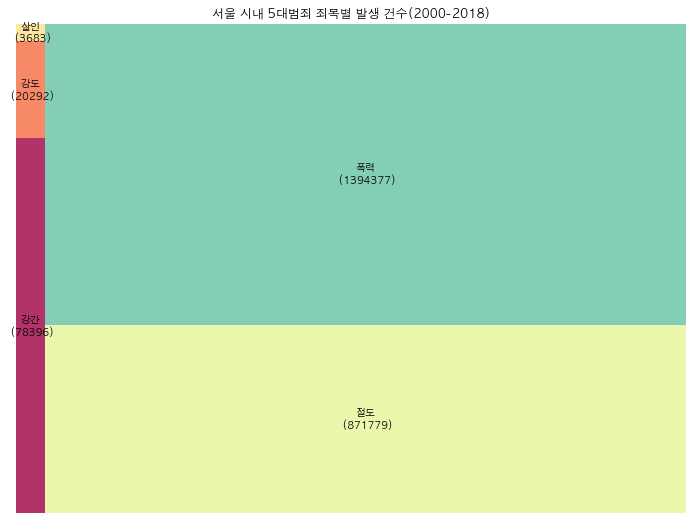

In [376]:
import squarify
plt.figure(figsize=(12,9))
squarify.plot(sizes=sizes, label=labels,color=colors, alpha=.8)

plt.title('서울 시내 5대범죄 죄목별 발생 건수(2000-2018)')
plt.axis('off')
plt.show()

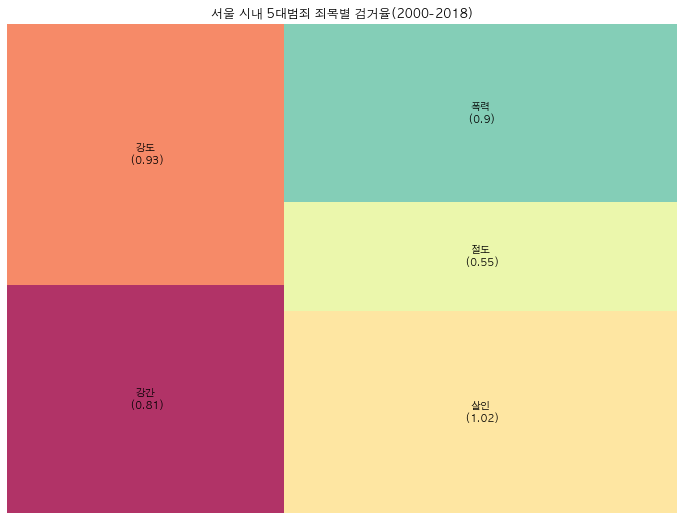

In [381]:
sizes1 = rate_crime['검거율'].values.tolist()
labels1 = rate_crime.apply(lambda x: str(x[0]) + "\n (" + str(round(x[3],2)) + ")", axis=1)

import squarify
plt.figure(figsize=(12,9))
squarify.plot(sizes=sizes1, label=labels1,color=colors, alpha=.8)

plt.title('서울 시내 5대범죄 죄목별 검거율(2000-2018)')
plt.axis('off')
plt.show()